In [7]:
import pandas as pd


DATA_SOURCE_PATH = 'speedtest.csv'

df = pd.read_csv(DATA_SOURCE_PATH)
df.head()

,download,upload,date
0,12.47,6.47,2022-07-06 17:55:44.743254
1,13.34,6.81,2022-07-06 17:58:45.046146
2,15.91,7.22,2022-07-06 17:59:48.943157
3,14.10,7.18,2022-07-06 18:00:49.385292
4,11.95,6.25,2022-07-06 18:01:44.345845


In [8]:
df.describe()

,download,upload
count,12114.000000,12114.000000
mean,27.390885,6.809990
std,89.162588,0.804284
min,1.000000,1.380000
25%,10.682500,6.760000
50%,16.610000,7.120000
75%,22.047500,7.250000
max,1022.400000,12.190000


In [9]:
# filter data bigger than 100

# Considering the overall average of the download speed, it's extremely unlikely that a user will have a download speed bigger than 50 MB/s.
outliers = df[df['download'] > 50]

print(f'There are {len(outliers)} outliers')

# remove outliers from df
clean_df = df
clean_df['download'] = df['download'].apply(lambda d: d if d < 50 else d / 100)

There are 239 outliers


In [10]:
clean_df.describe()

,download,upload
count,12114.000000,12114.000000
mean,15.682963,6.809990
std,7.842588,0.804284
min,0.608400,1.380000
25%,9.962500,6.760000
50%,16.220000,7.120000
75%,21.580000,7.250000
max,40.990000,12.190000


Overall Average: 16.53mb

In [23]:
from dateutil import parser

str(parser.parse(clean_df['date'][0]).date())

# pd.to_datetime(clean_df['date'][0]).day_name()

# add day and hour label to facilitate grouping
clean_df['day'] = clean_df['date'].apply(lambda d: parser.parse(d).day)
clean_df['day_name'] = clean_df['date'].apply(lambda d: pd.to_datetime(d).day_name())
clean_df['hour'] = clean_df['date'].apply(lambda d: parser.parse(d).hour)
clean_df['short_date'] = clean_df['date'].apply(lambda d: d[5:11])
clean_df['label_date'] = clean_df['short_date'].astype(str) + clean_df['day_name'].astype(str)
clean_df.sort_values('date', inplace=True)
clean_df.head()


,download,upload,date,day,day_name,hour,short_date,label_date
0,12.47,6.47,2022-07-06 17:55:44.743254,6,Wednesday,17,07-06,07-06 Wednesday
1,13.34,6.81,2022-07-06 17:58:45.046146,6,Wednesday,17,07-06,07-06 Wednesday
2,15.91,7.22,2022-07-06 17:59:48.943157,6,Wednesday,17,07-06,07-06 Wednesday
3,14.10,7.18,2022-07-06 18:00:49.385292,6,Wednesday,18,07-06,07-06 Wednesday
4,11.95,6.25,2022-07-06 18:01:44.345845,6,Wednesday,18,07-06,07-06 Wednesday


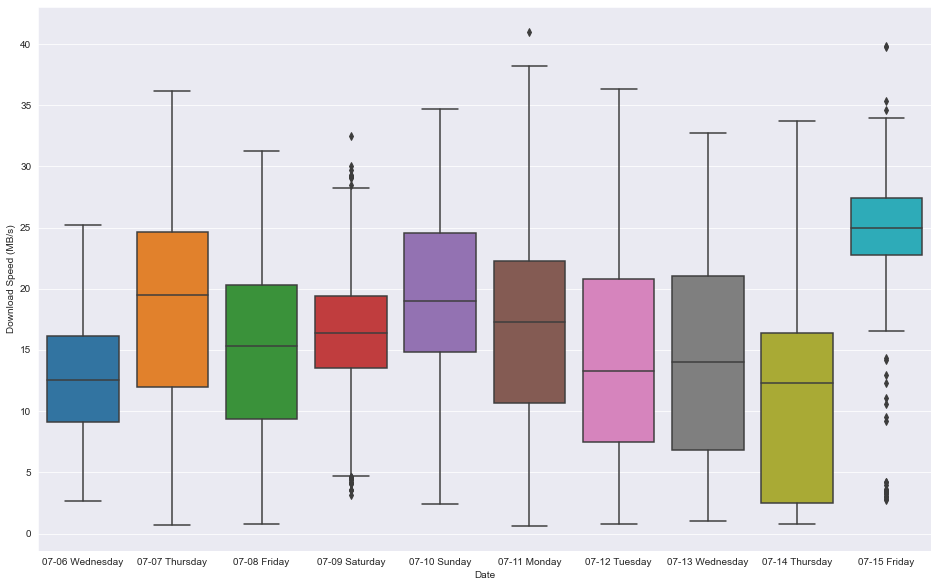

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))
fig = sns.boxplot(x='label_date', y='download', data=clean_df, )
plt.xlabel('Date')
plt.ylabel('Download Speed (MB/s)')
plt.show(fig)

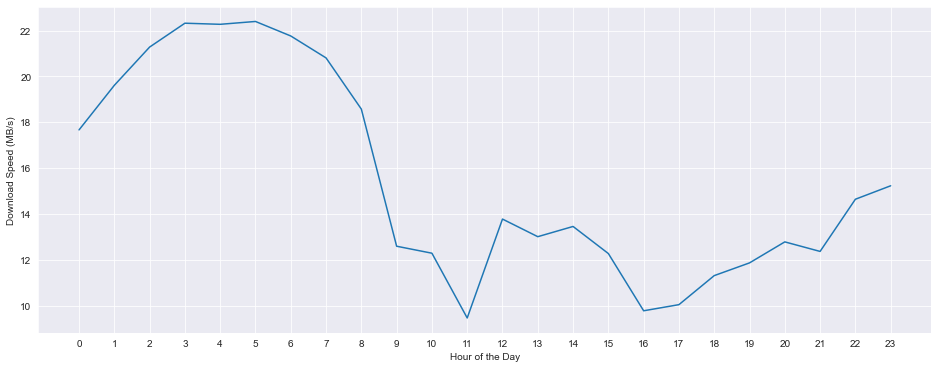

In [28]:
plt.figure(figsize=(16,6))
group_by_hour = clean_df.groupby('hour').mean()
fig = sns.lineplot(x='hour', y='download', data=group_by_hour)
fig.set_xticks(range(len(group_by_hour)), labels=range(0, 24))
plt.xlabel('Hour of the Day')
plt.ylabel('Download Speed (MB/s)')
plt.show(fig)

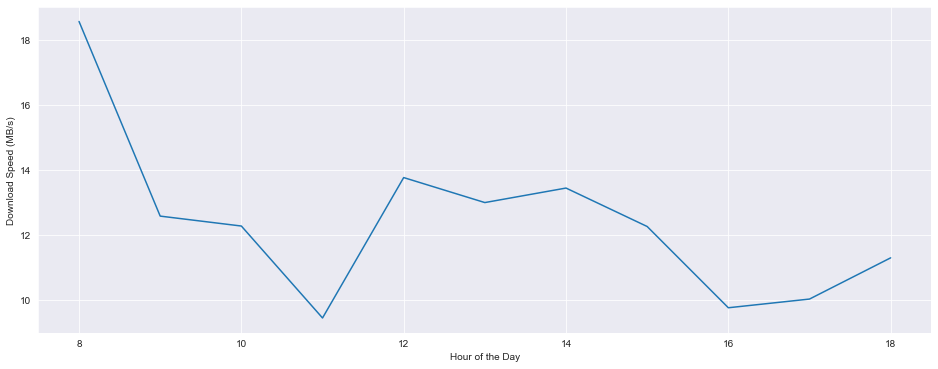

In [37]:
plt.figure(figsize=(16,6))
condition = (clean_df['hour'] < 19) & (clean_df['hour'] > 7)
group_by_hour = clean_df[condition].groupby('hour').mean()
fig = sns.lineplot(x='hour', y='download', data=group_by_hour)
# fig.set_xticks(range(len(group_by_hour)), labels=range(0, 24))
plt.xlabel('Hour of the Day')
plt.ylabel('Download Speed (MB/s)')
plt.show(fig)

media de cada horario do dia (lineplot?)
ontem
overall average
overall graph (grouped average by hour)
boxplot (average by day)




<AxesSubplot:>

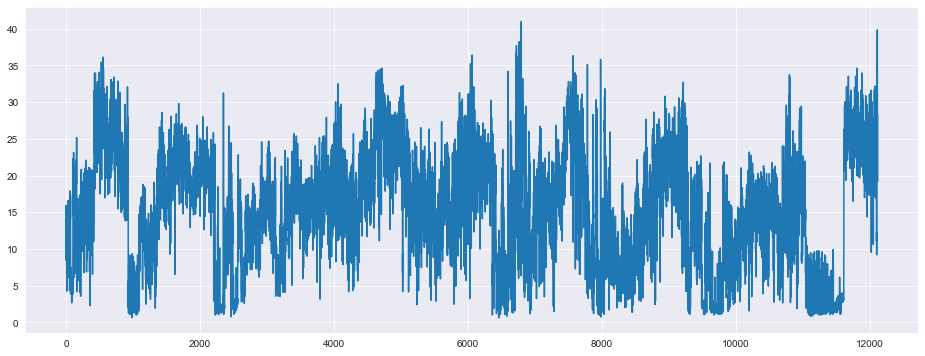

In [14]:
plt.figure(figsize=(16,6))
clean_df['download'].plot()

In [15]:
/

()